# A Brief Introduction to FFT

## 1 概念

### 1.1 Fourier级数

$$f(x) = a_0 + \sum_{k=1}^\infty a_k cos(kx) + b_k sin(kx)$$
其中，
$a_0 = \frac{1}{2\pi}\int_{-\pi}^\pi f(x) dx$, $a_n = \frac{1}{\pi}\int_{-\pi}^\pi f(x) cos(nx) dx$, $b_n = \frac{1}{\pi}\int_{-\pi}^\pi f(x) sin(nx) dx$,

这里，$a_n$和$b_n$被称为f(x)的Fourier系数。

### 1.2 Fourier积分

### 1.3 Fourier变换

FFT: time domain -> frequency domain

$$F(\omega) = F[f(x)] = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^\infty f(x) e^{- i \omega x} dx$$

iFFT: frequency domain -> time domain

$$f(x) = F^{-1}[F(\omega)] = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^\infty F(\omega) e^{i \omega x} dx$$

上面的Fourier变换可以从Fourier级数出发，结合三角恒等式，到Fourier积分从而得到。

### 1.4 性质

+ 线性:

$$F(af_1 + bf_2) = aF(f_1) + bF(f_2)$$

+ 卷积:

    + $$f_1 \ast f_2 = \int_{-\infty}^\infty f_1(x - t) f_2(t) dt$$

    + $$F(f_1 \ast f_2) = F(f_1)F(f_2)$$

    + $$f_1 \ast f_2 = F^{-1}[F(f_1)F(f_2)]$$

    + $$F(f_1 f_2) = \frac{1}{2\pi} F(f_1) \ast F(f_2)$$

+ 微商:

当$|x|=\infty$时f(x)->0

$$F[f^{(m)}(x)] = (-i\omega)^m F[f(x)]$$

## 2 Python实现

numpy.fft中包含fft, fft2, fftn, ifft, rfftn, fftfreq等多维FFT操作。 

In [1]:
#%matplotlib inline
%matplotlib notebook

<IPython.core.display.Javascript object>


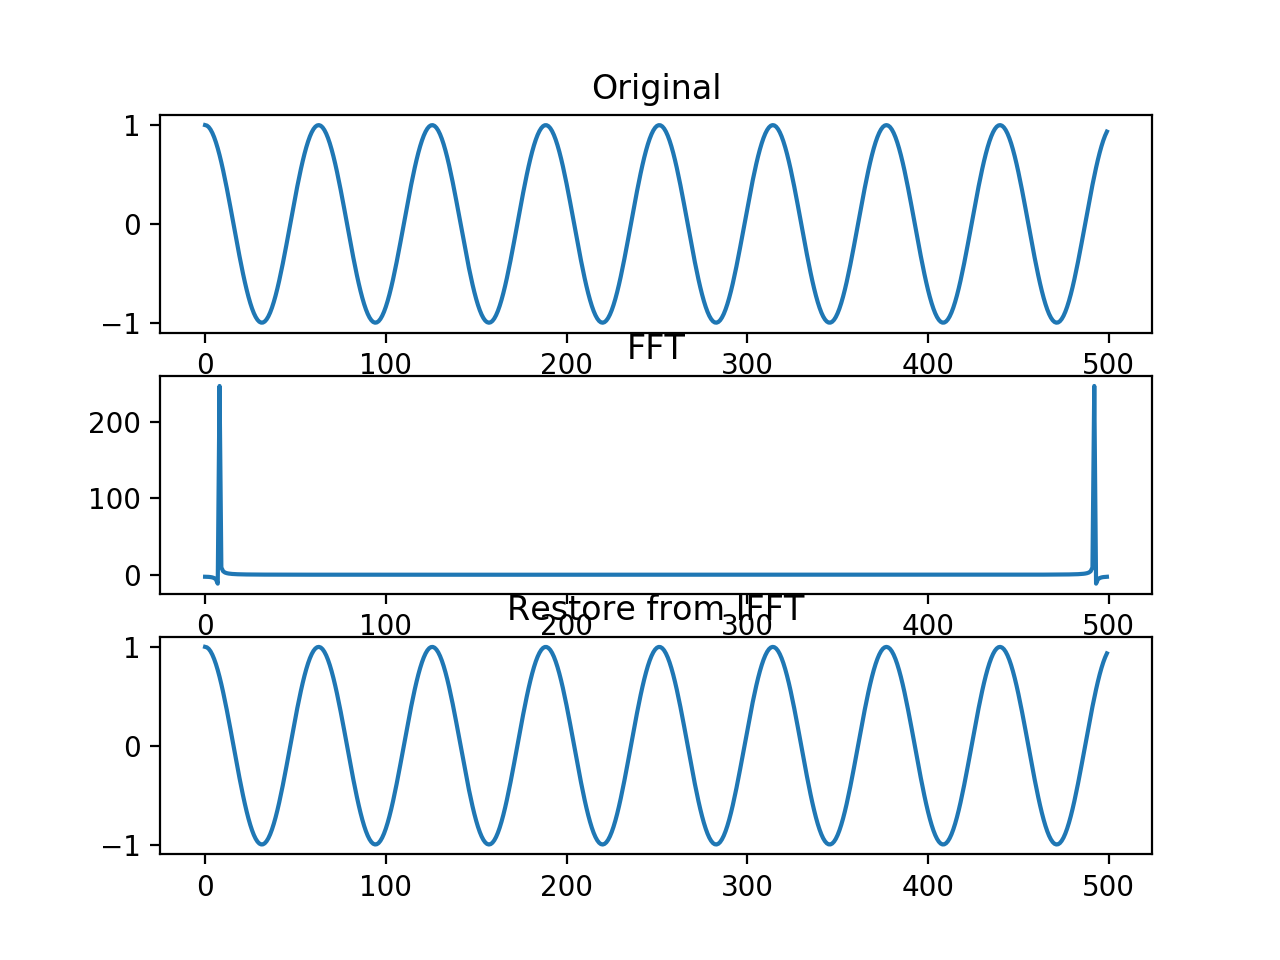

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = [0.1*i for i in range(500)] 
y = np.cos(x)
transy = np.fft.fft(y)
transx = np.fft.ifft(transy)

plt.subplot(3, 1, 1)
plt.plot(y)
plt.title("Original")

plt.subplot(3, 1, 2)
plt.plot(transy)
plt.title("FFT")

plt.subplot(3, 1, 3)
plt.plot(transx)
plt.title("Restore from IFFT")

plt.show()

## 3 PDE

### 3.1 一般形式：

$$F(x, y, \dots, u, u_x, u_y, \dots) = 0$$

二阶PDE

$$Au_{xx} + 2Bu_{xy} + Cu_{yy} + \dots = 0$$

   + 椭圆型：$B^2 - AC < 0$
   + 抛物型：$B^2 - AC = 0$
   + 双曲型：$B^2 - AC > 0$

### 3.2 类型：

+ 线性PDE
+ 拟线性PDE
+ 非线性PDE

### 3.3 例子：

+ 波动

$$u_{tt} = a^2 u_{xx} + f(x, t)$$

+ 热传导

$$u_t = a^2 u_{xx} + f(x, t)$$

+ Laplacian

$$u_{xx} + u_{yy} + u_{zz} = 0$$

+ 冲击波

$$u_t + u u_x = 0$$

+ KdV

$$u_t + \sigma u u_x + u_{xxx} = 0$$

### 3.4 定解条件：

+ 初始条件：或称为Cauchy初始条件

$$u(M, 0) = \phi(M), M \in \Omega$$

+ 边界条件

    + 第一类边界条件，即Dirichlet边界条件
    
    $$u |_{\partial \Omega} = f$$
    
    + 第二类边界条件，即Neumann边界条件
    
    $$\frac{\partial u}{\partial n} |_{\partial \Omega} = f$$
    
    这里的n表示$\partial \Omega$的外法线方向
    
    + 第三类边界条件，即Robin边界条件或称混合边界条件
    
    $$(\frac{\partial u}{\partial n} + \sigma u)|_{\partial \Omega} = f$$

### 3.5 热传导问题

一维齐次

$$\frac{\partial u}{\partial t} = a^2 \frac{\partial^2 u}{\partial x^2}, -\infty < x < \infty, t > 0$$
初值为
$$u(x, 0) = \varphi(x), -\infty < x < \infty$$

这里，$\varphi(x)$ 可以取 $sin(x)$, $cos(x)$, 或x<sup>2</sup> + 1等。

将t视为参数，对上面两端进行关于x的Fourier变换，记$F[u(x, t)] = \tilde{u}(\omega, t)$, $F^{-1}[\tilde{u}(\omega, t)] = u(x, t)$, $F[\varphi(x)] = \tilde{\varphi}(\omega)$，则利用上面的微商性质，可以得到

$$F[\frac{d^2 u(x, t)}{d x^2}] = (-i\omega)^2 F[u(x, t)] = - \omega^2 \tilde{u}(\omega, t)$$
和
$$F[\frac{d u(x, t)}{d t}] = \frac{d F[u(x, t)]}{d t} = \frac{d \tilde{u}(\omega, t)}{d t} = \frac{d \tilde{u}}{d t}$$
以及初值
$$F[u(x, 0)] = \tilde{u}(\omega, 0)$$

从而将原一维齐次热传导方程变换成

$$\frac{d \tilde{u}(\omega, t)}{d t} + a^2 \omega^2 \tilde{u}(\omega, t) = 0$$
和
$$\tilde{u}(\omega, 0) = \tilde{\varphi}(\omega)$$

对上面的方程进行积分，并考虑初值，得到

$$\tilde{u}(\omega, t) = \tilde{\varphi}(\omega) e^{-a^2 \omega^2 t}$$

对上式考虑关于$\omega$的逆Fourier变换，

$$u(x, t) = F^{-1}[\tilde{\varphi}(\omega) e^{-a^2 \omega^2 t}] = F^{-1}[\tilde{\varphi}(\omega)] \ast F^{-1}[e^{-a^2 \omega^2 t}] = \varphi(x) \ast \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^\infty e^{-a^2 \omega^2 t} e^{i \omega x} d \omega$$
=
$$\varphi(x) \ast \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^\infty e^{-a^2 \omega^2 t} (cos(\omega x) + i \sin(\omega x)) d \omega = \varphi(x) \ast \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^\infty e^{-a^2 \omega^2 t} \cos(\omega x) d \omega = \frac{1}{2 a \sqrt{\pi t}} e^{-\frac{x^2}{4 a^2 t}} \ast \varphi(x) = \frac{1}{2 a \sqrt{\pi t}} \int_{-\infty}^\infty e^{-\frac{(x - \omega)^2}{4 a^2 t}} \varphi(\omega) d \omega$$

证毕。

In [4]:
# python code
import numpy as np
from scipy.integrate import quad, dblquad, nquad

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

import seaborn
from matplotlib import colors

In [5]:
a = 1.0
def phi(w):
    return np.sin(w)

def u(x, t):
    return quad(lambda w: np.exp(-(x - w) ** 2 / (4 * a ** 2 * t)) * phi(w), -np.inf, np.inf)[0] / (2 * a * np.sqrt(np.pi * t))

<IPython.core.display.Javascript object>


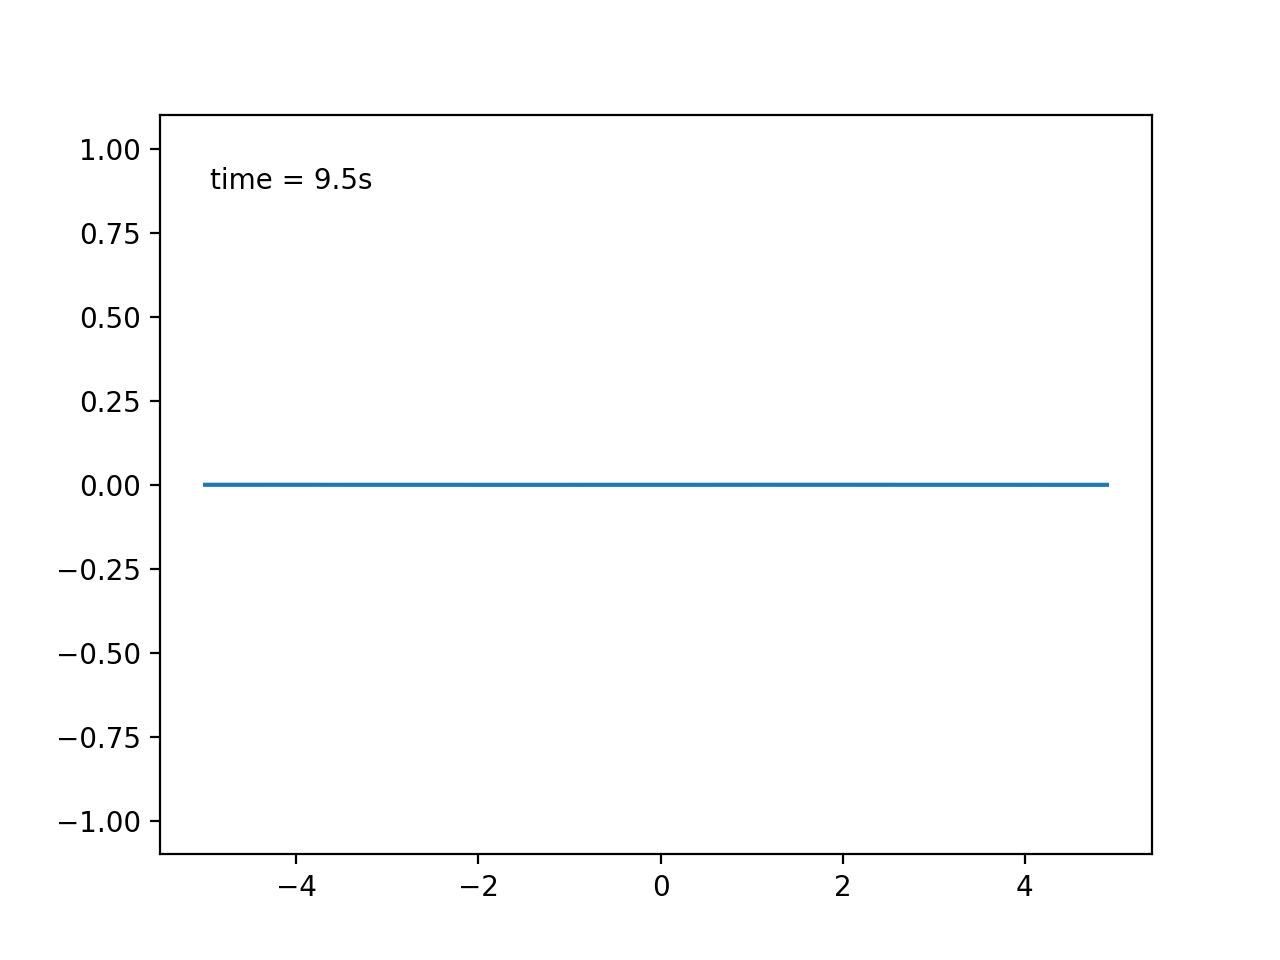

In [6]:
fig, ax = plt.subplots()

x = np.arange(-5.0, 5.0, 0.1)
line, = ax.plot(x, phi(x))

time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line.set_ydata(np.ma.array(x, mask=True))
    return line, time_text

def animate(t):
    line.set_ydata([u(xi, t) for xi in x])
    time_text.set_text(time_template % (t))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, frames=np.arange(0.01, 10, 0.5), init_func=init,
                              interval=10, blit=True, repeat=False)

### 3.6 波动问题

$$\frac{\partial^2 u}{\partial t^2} - a^2 \frac{\partial^2 u}{\partial x^2} = 0, -\infty < x < \infty, t > 0$$
和初值
$$u(x, 0) = \varphi(x), -\infty < x < \infty$$
以及
$$\frac{\partial u(x, 0)}{\partial t} = 0$$

中间变换同上，将原方程变换成

$$\frac{d^2 \tilde{u}(\omega, t)}{d t^2} + a^2 \omega^2 \tilde{u}(\omega, t) = 0$$
和初值
$$\tilde{u}(\omega, 0) = \tilde{\varphi}(\omega)$$
以及
$$\tilde{u}_t(\omega, 0) = 0$$

对其中第一式进行积分，并考虑第二三式，得到

$$\tilde{u}(\omega, t) = \tilde{\varphi}(\omega) cos(a \omega t)$$

对上式考虑关于$\omega$的逆Fourier变换，

$$u(x, t) = F^{-1}[\tilde{\varphi}(\omega) \cos(a \omega t)] = \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^\infty \tilde{\varphi}(\omega) \cos(a \omega t) e^{- i \omega x} d \omega = \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^\infty \tilde{\varphi}(\omega) [\frac{e^{i a \omega t} + e^{- i a \omega t}}{2}] e^{- i \omega x} d \omega = \frac{1}{2} [\varphi(x + a t) + \varphi(x - a t)]$$

还可以利用Fourier变换的性质进行证明

证毕。

In [7]:
a = 1.0
def phi(w):
    return (2 / (np.exp(w) + np.exp(-w))) ** 2

def u1(x, t):
    return (phi(x + a * t) + phi(x - a * t)) / 2

<IPython.core.display.Javascript object>


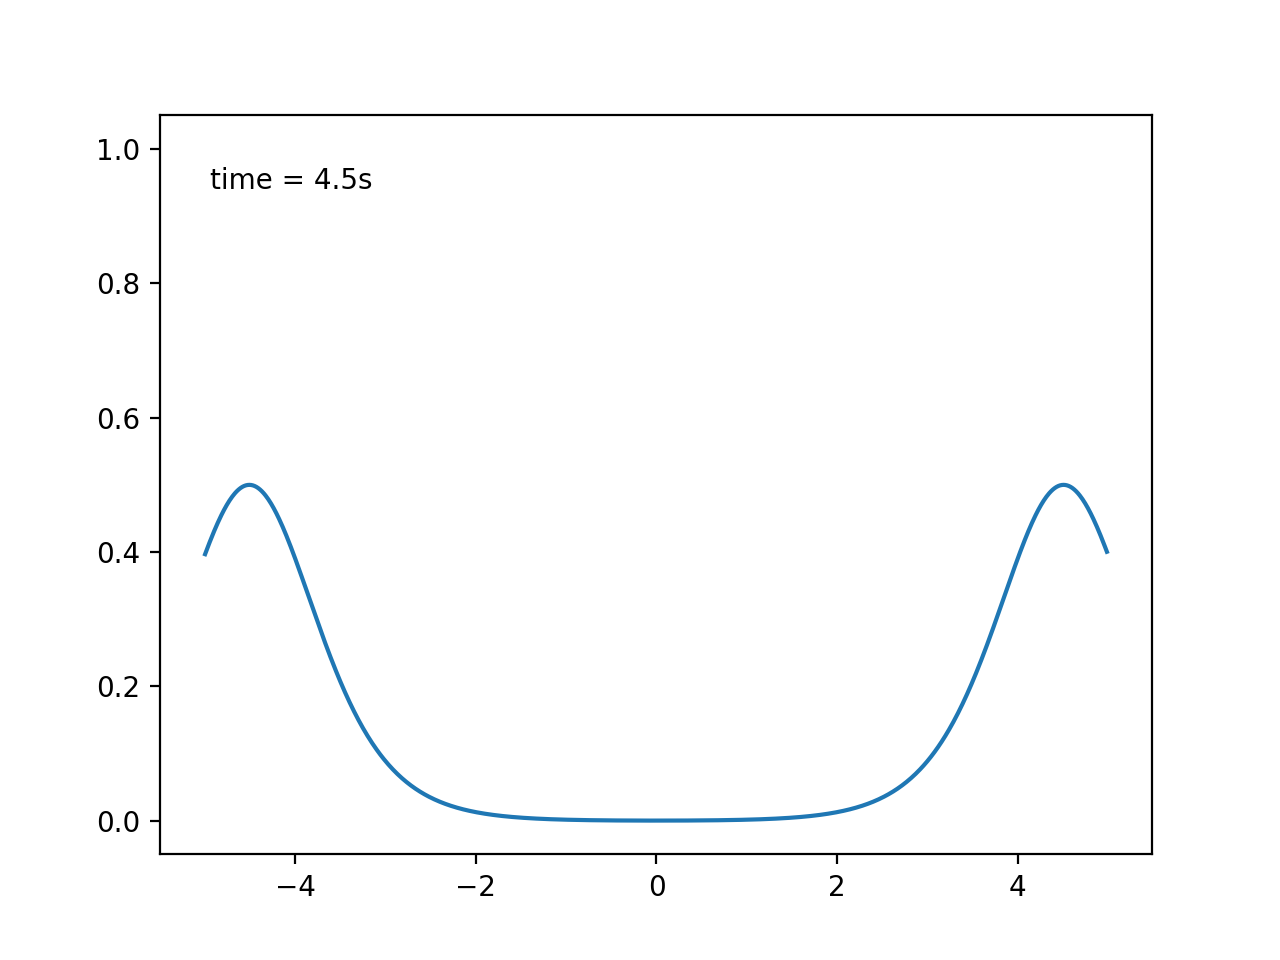

In [8]:
fig, ax = plt.subplots()

x = np.arange(-5.0, 5.0, 0.01)
line, = ax.plot(x, phi(x))

time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line.set_ydata(np.ma.array(x, mask=True))
    return line, time_text

def animate(t):
    line.set_ydata([u1(xi, t) for xi in x])
    time_text.set_text(time_template % (t))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, frames=np.arange(0.01, 5, 0.5), init_func=init,
                              interval=10, blit=True, repeat=False)

### 3.7 3D输出

#### 3.7.1 3D图形

<IPython.core.display.Javascript object>


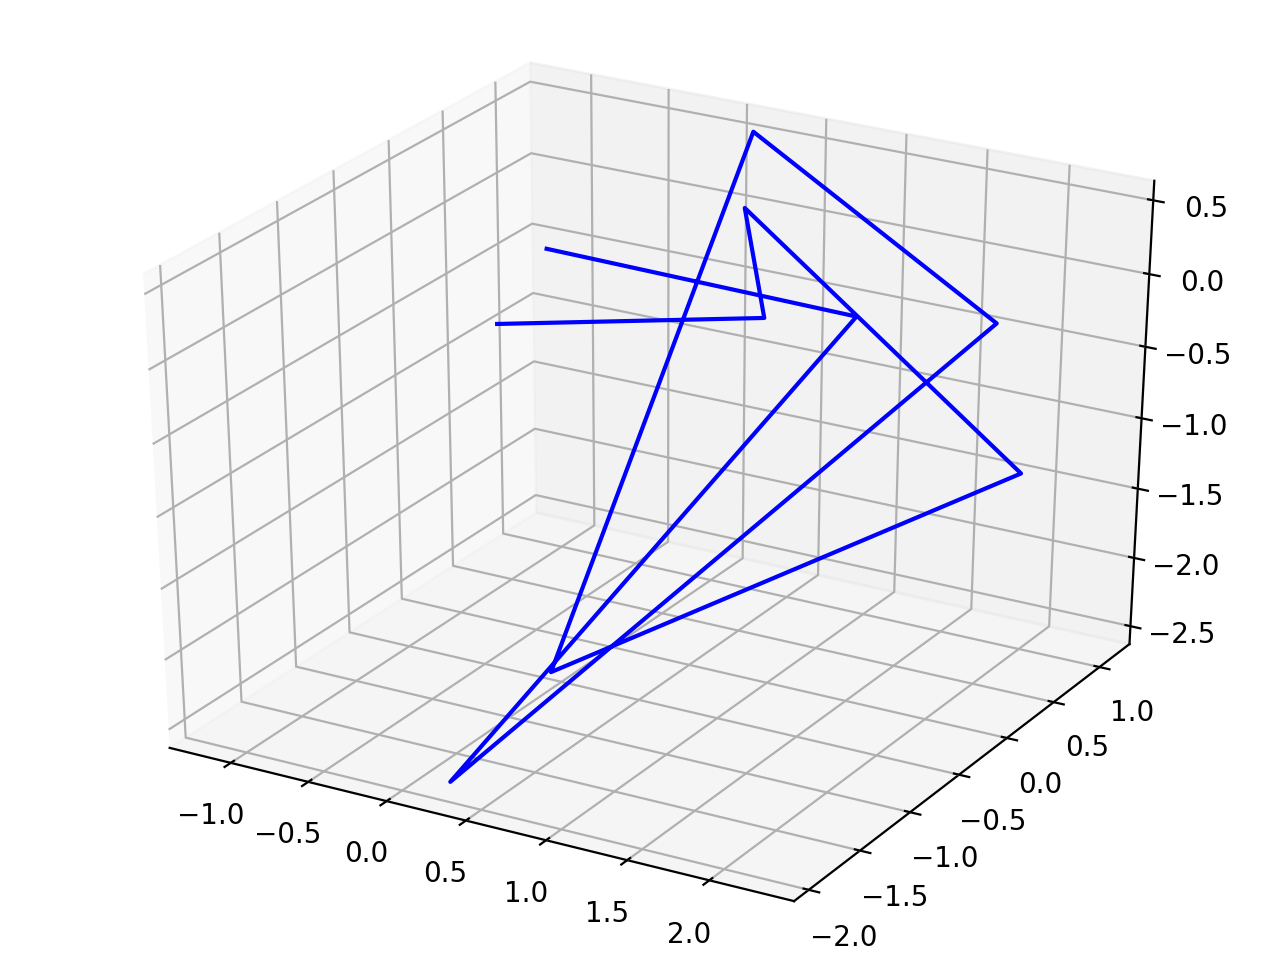

In [9]:
fig=plt.figure()
ax=Axes3D(fig)

ax.plot(np.random.randn(10), np.random.randn(10), np.random.randn(10), 'b', markersize=8)

plt.show()

<IPython.core.display.Javascript object>


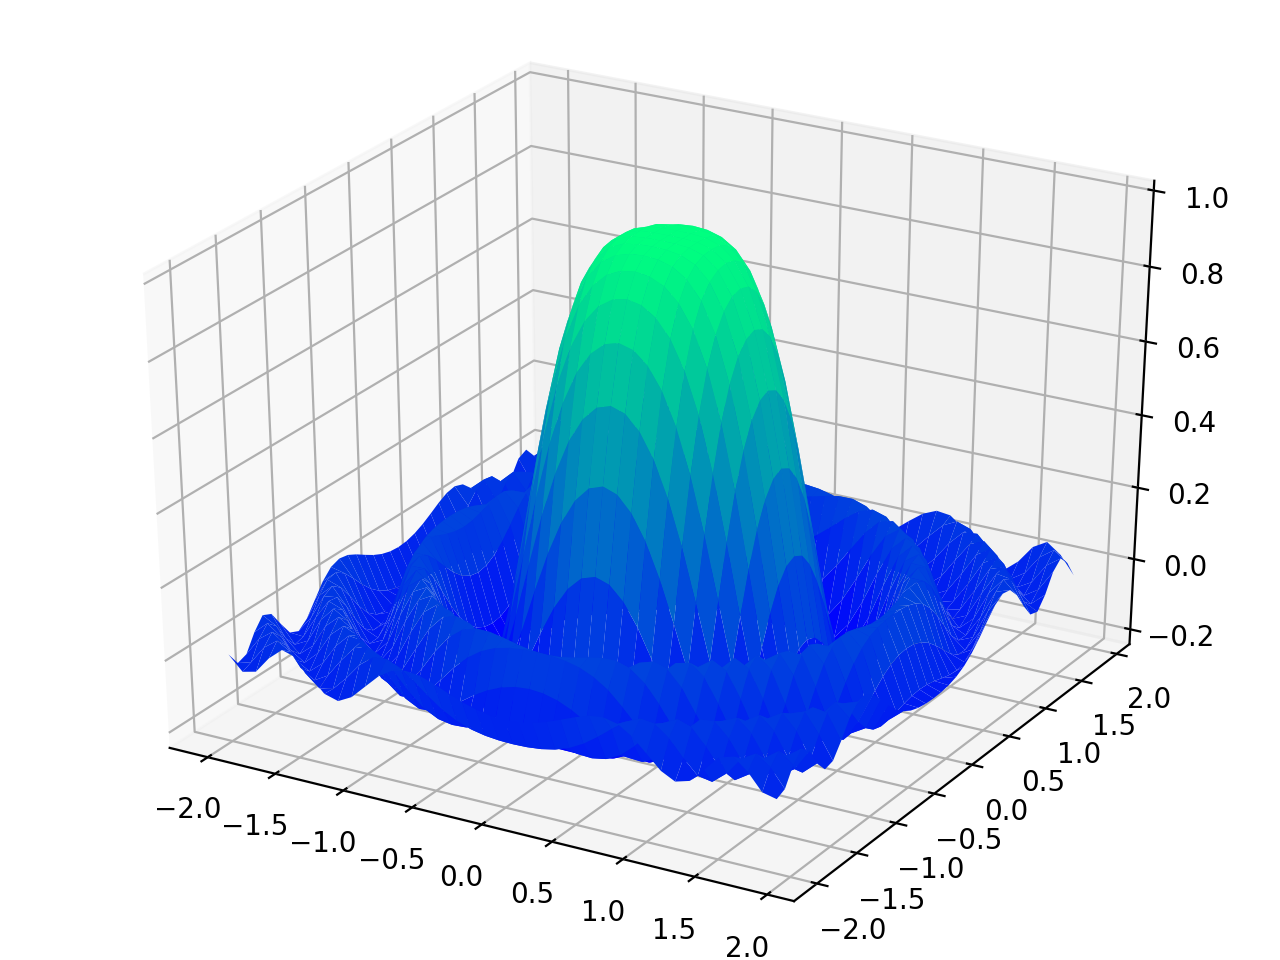

In [10]:
fig = plt.figure()
ax = Axes3D(fig)

X = np.arange(-2, 2, 0.1)
Y = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(X, Y)
Z = np.sinc(X ** 2 + Y ** 2)

ax.plot_surface(X, Y, Z, cmap=plt.cm.winter)
 
plt.show()

#### 3.7.2 3D动画

<IPython.core.display.Javascript object>


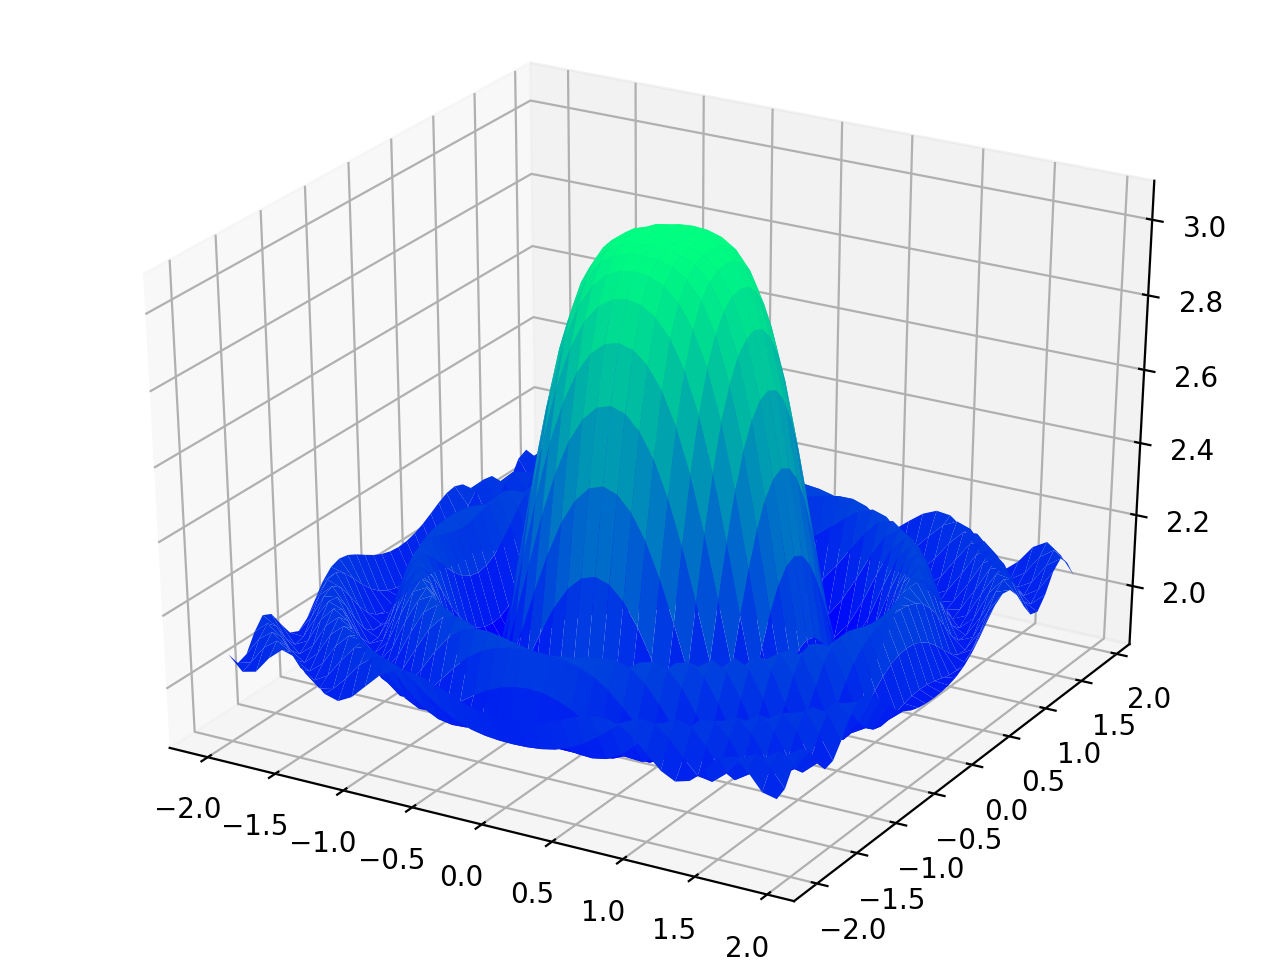

In [11]:
fig = plt.figure()
ax=Axes3D(fig)

X = np.arange(-2, 2, 0.1)
Y = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(X, Y)
Z = np.sinc(X ** 2 + Y ** 2)

def init():
    surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.winter)
    return surf
                     
def update(i):
    ax.clear()
    surf = ax.plot_surface(X, Y, Z + np.random.rand() * 10 , cmap=plt.cm.winter)
    return surf

anim = animation.FuncAnimation(fig, update, init_func=init,
                              frames=50, interval=2, blit=True, repeat=False)
# Save as mp4. This requires mplayer or ffmpeg to be installed
#anim.save('anim.mp4', fps=15, extra_args=['-vcodec', 'libx264'])